In [1]:
import os
import tarfile
import urllib

## 데이터 다운 받고 살펴보기

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# total bedrooms에 누락값이 존재한다

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


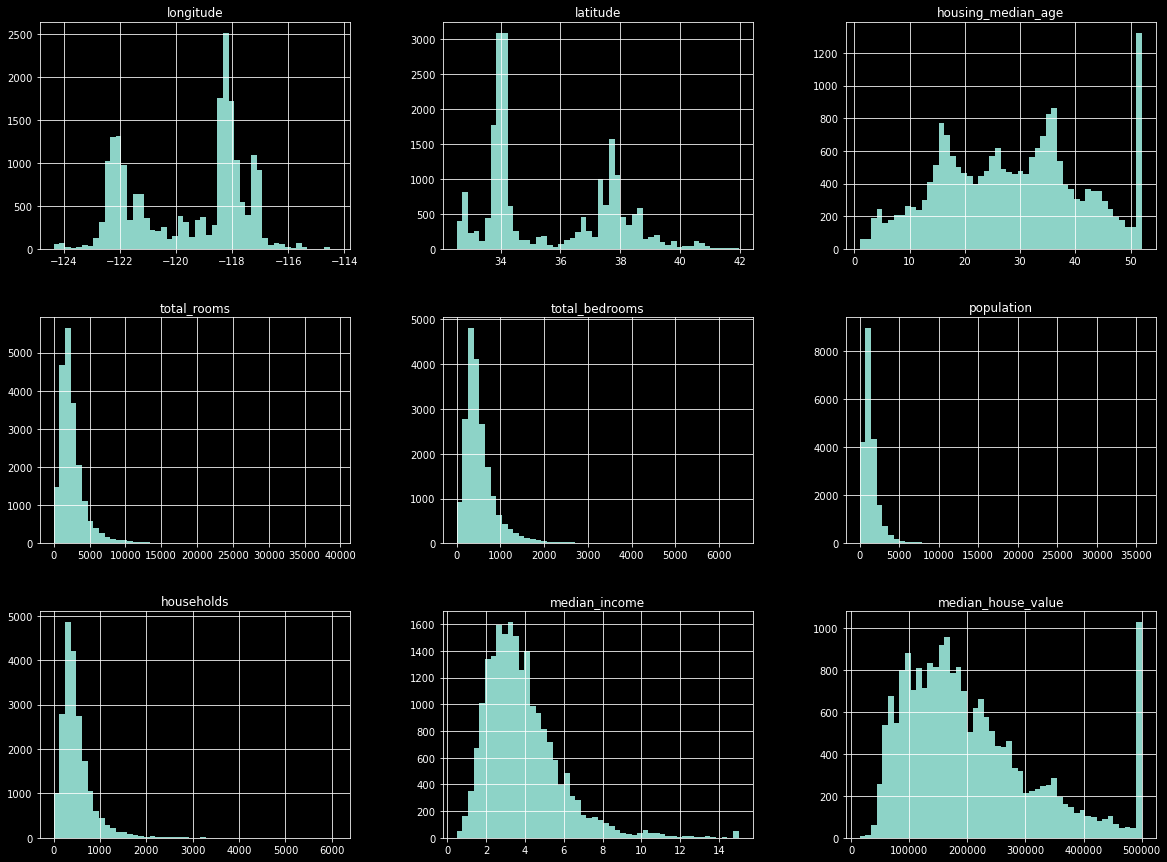

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## 테스트셋 만들기

In [10]:
import numpy as np

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [12]:
# 사이킷런에 내장된 훈련셋과 테스트셋을 나누어주는 함수
# row의 개수가 동일한 여러 데이터들을 동시에 잘라줄 수 있고 test_size, random_state를 정할 수 있다.

from sklearn.model_selection import train_test_split

tranin_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=42)

### stratified Sampling
데이터 셋이 충분히 크지않다면 무작위로 추출한 샘플이 대표성을 띄기가 힘들다

<AxesSubplot:>

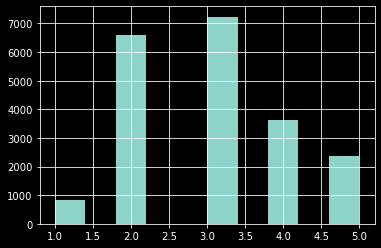

In [13]:
# 계층을 나눌 때는 계층마다 충분한 샘플이 있어야 편향이 발생하지 않는다.
# 각 소득 카테고리 [1,5]가 충분히 많은 샘플을 가지도록 나눠준다.

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [14]:
# 51:49로 된 샘플에서도 무작위 추출을 하면 편향이 발생한다.
# 계층적 샘플링을 통하여 각 계층에서 올바른 비율을 가진 샘플을 추출하도록 설정하자
# 각 계층에서 동일 비율을 뽑아야 새로 만든 데이터 셋이 대표성을 가질 수 있다.

from sklearn.model_selection import StratifiedShuffleSplit as SSS

# n_splits는 몇 번 섞을지 결정
# StratifiedShuffleSplit이 알아서 각 계층에서 동일한 비율을 가지고 샘플을 뽑게 해준다.
split = SSS(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
# 계층적 샘플링 결과 원본과 비슷한 비율로 새로운 데이터셋이 형성되었음을 알 수 있다.

orig_set_result = housing["income_cat"].value_counts()/len(housing)
test_set_result = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
orig_set_result = orig_set_result.sort_index()
test_set_result = test_set_result.sort_index()
print(orig_set_result,'\n\n',test_set_result,'\n\n',orig_set_result-test_set_result)

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64 

 1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64 

 1    0.000097
2    0.000048
3    0.000048
4   -0.000048
5   -0.000145
Name: income_cat, dtype: float64


In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 데이터 살펴보기

### 데이터 시각화 (산포도)

In [17]:
housing = strat_train_set.copy()

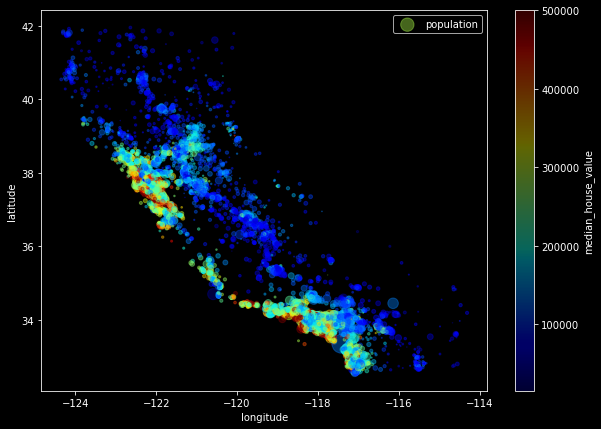

In [18]:
# alpha로 투명도를 조절하고 s: 원의 반지름, c: 색상, colormap(cmap)은 jet를 이용

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False) #sharex가 있어야 x축과 legend가 표시됨.
plt.legend()

### 상관관계 (correleation)

In [19]:
corr_matrix = housing.corr()
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

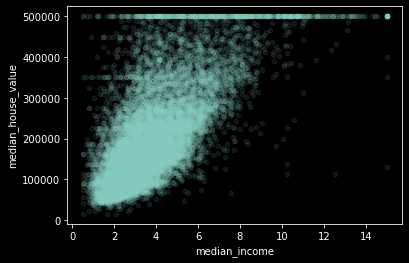

In [21]:
# 상관계수가 높은 중위 소득과 주택 가격을 보면
# 500000$ 이상의 값이 잘려서 수평하게 보인다
# 상관계수가 높기에 많이 퍼지지 않았지만 중간중간에 일직선으로 모이는 값이 보인다

housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

## 데이터 준비

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 누락값 처리

In [23]:
# 앞서 봤을 때 total_bedrooms에 NA가 존재한다.

housing.dropna(subset=["total_bedrooms"]) # total_bedrooms가 NA인 데이터를 삭제
# housing.drop("total_bedrooms",axis=1) # 아예 total_bedrooms 속성을 삭제
# housing["total_bedrooms"].fill_na(housing["total_bedrooms"].median())
# NA값을 평균으로 대체


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # 기본값은 mean 평균값으로 대체한다.

In [25]:
# 중간값은 수치형 특성에서만 계산이 가능하므로 텍스트 형태로 된 ocean_proximity를 지운다
# fit을 통하여 imputer에 각 특성별 중간값을 계산시킴.

numeric_housing = housing.drop("ocean_proximity",axis =1)

imputer.fit(numeric_housing)

SimpleImputer(strategy='median')

In [26]:
# imputer에 각 특성별 중간값이 계산된다.
# 나중에 데이터가 추가될 때 어떤 값이 누락될 지 모르니까 일단 모든 수치형 특성에 적용하자

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [27]:
# 누락된 값을 채워준 뒤 이를 numpy 배열로 반환해준다.

X = imputer.transform(numeric_housing)

X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [28]:
# numpy 배열을 다시 DataFrame 형태로 변환

housing_tr = pd.DataFrame(
    X, columns=numeric_housing.columns,
    index=numeric_housing.index)

housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### 텍스트와 범주형 특성

In [29]:
# 텍스트 데이터를 그대로 갖다 쓸 수는 없다.

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [30]:
# sklearn의 OrdinalEncoer를 이용하면 알아서 숫자로 변환해준다.
# 다만 이 경우, 가까이 있는 두 값(1,2처럼)이 떨어져 있는 값보다 비슷하다고 생각한다.

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [31]:
encoder.categories_ # 카테고리의 ID가 담긴 리스트 반환

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
# 원 핫 인코더를 이용하면 히소 행렬로 값을 뽑을 수 있다.
# 해당 레이블에 속한 col만 1이고 나머지 col은 0으로 채워지는 형식

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [33]:
encoder.categories_ # 역시 동일하게 카테고리 리스트가 존재

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 나만의 변환기 만들기

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]  # 열 인덱스 구하기


# TransformerMixin을 상속하면 get_params()와 set_params()를 얻게됨 (*args,**kwargs 이용 X)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

### 특성 스케일링
몇가지를 제외한 머신러닝 알고리즘들은 입력 특성의 스케일이 많이 다르면 작동 X  
이를 위하여 특성의 범위를 같도록 만들어주는 과정이 필요

#### min-max 스케일링 (정규화)
모든 데이터에 최소값을 빼주고 최댓값과 최솟값의 차이로 나누어 주면 0~1 사이 값에 바운딩된다.  
사이킷런: MinMaxScaler 변환기  
#### 표준화 (standardization)
평균 빼고 표준편차로 나누어 그 결과 분산 값이 1이 되도록 하는 과정을 수행  
다만 정규화와 달리 상한값과 하한값이 존재X  
사이킷런: StandardScaler 변환기

### 파이프라인 활용

In [35]:
# 변환 단계가 많기 때문에 연속된 변환을 처리하여 주는 Pipeline 클래스를 이용

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(numeric_housing)
housing_num_tr = pd.DataFrame(
    housing_num_tr,
    columns=list(numeric_housing.columns) +
    ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=numeric_housing.index)
housing_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928


In [36]:
# ColumnTransformer는 서로다른 col들이 독립적으로 transformer(달라도 됨)을 적용받게 해준다.
# 이후 이들을 합쳐주는 역할을 하는데 만약 희소 행렬과 밀집 행렬이 섞여있으면 밀집 정도에 따라 결정

from sklearn.compose import ColumnTransformer

num_attribs = list(numeric_housing)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
# ColumnTransformer 이용 결과 밀집 행렬과 희소 행렬이 합쳐진 데이터를 얻을 수 있다.

pd.DataFrame(housing_prepared, index=housing.index,
             columns=list(numeric_housing.columns) +
             ["rooms_per_household", "population_per_household", "bedrooms_per_room"] +
             [i for i in encoder.categories_[0]])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
12053,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
13908,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
11159,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


## 모델 선택과 훈련

In [38]:
# 일단 선형 회귀 모델로 넣어보자

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels) # 일단 훈련 끝

LinearRegression()

In [39]:
# 주어진 데이터의 앞에서부터 5개를 넣기

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data = full_pipeline.transform(some_data)
print("prediction: ",lin_reg.predict(some_data))
print("labels: ",list(some_labels))

prediction:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [40]:
# 전체 훈련셋에 대한 모델의 RMSE를 측정하기

from sklearn.metrics import mean_squared_error

some_predict = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels,some_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [41]:
# 오차가 큰걸보니 과소적합된 듯하다. 모델을 더 복잡한 걸 써보자

from sklearn.tree import DecisionTreeRegressor #의사결정트리를 가져왔다

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [42]:
some_predict = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,some_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # 오차가 없다 => 오버피팅 (모델이 너무 복잡해서 그렇다)

0.0

### 교차 검증 이용

In [43]:
# K-fold cross validation을 이용하여 K개 데이터셋중 하나를 검증에, 나머지를 훈련에 이용해보자

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# 사이킷런의 cross validation은 scoring 파라미터에 오차 함수가 아닌 효용 함수 (클수록 좋음)를 기대
# 따라서 가장 큰 값을 가장 좋은 값으로 판단하게 되는데 반대로 MSE는 가장 작은 값이 가장 좋은 값.
# 따라서 모든 값에 -를 붙여줌으로 써 큰 값일수록 안좋게 만들어주고 반대로 작은 값일 수록 좋게 만듬.
# 이러지 않기에는 이미 GridSearch와 같이 값을 줄이는 데 최적화 된 API들이 이미 존재 (값이 작을 수록 좋다)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print("score: ", scores)
    print("mean: ", scores.mean())
    print("std: ", scores.std())

display_scores(tree_rmse_scores)

score:  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
mean:  70666.74616904806
std:  2928.322738055112


어째 오차가 더 커졌다. (선형회귀는 끽해야 69,000$의 오차를 보였다)

In [45]:
lin_scores = cross_val_score(lin_reg,housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

score:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean:  69052.46136345083
std:  2731.674001798348


여러 모델을 모아서 하나의 모델로 만드는 앙상블 학습을 활용하는 랜덤포레스트를 이용해보자

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg,housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

score:  [49557.6095063  47584.54435547 49605.349788   52325.13724488
 49586.9889247  53154.87424699 48800.48987508 47880.32844243
 52958.68645964 50046.17489414]
mean:  50150.018373763225
std:  1902.0697041387534


좀 나아지긴 했지만 여전히 50,000$ 부근의 오차를 보인다

### 모델 세부 튜닝

In [47]:
from sklearn.model_selection import GridSearchCV
# dict에 있는 모든 조합들을 시도해보고 최적의 파라미터를 반환하여준다.
param_grid = [
    {'n_estimators': [3,10,30],'max_features': [2,4,6,8]},
    {'bootstrap':[False],'n_estimators': [3,10], 'max_features':[2,3,4]}
]

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
# 최적의 파라미터 결과와 추정기를 저장해준다.
# 그리고 각각의 파라미터에서의 결과를 출력가능

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_,'\n')

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'max_features': 6, 'n_estimators': 30} 

RandomForestRegressor(max_features=6, n_estimators=30) 

63433.40391736115 {'max_features': 2, 'n_estimators': 3}
56049.06443637957 {'max_features': 2, 'n_estimators': 10}
52824.848527310685 {'max_features': 2, 'n_estimators': 30}
60924.41328448018 {'max_features': 4, 'n_estimators': 3}
52713.650694157855 {'max_features': 4, 'n_estimators': 10}
50660.92190603788 {'max_features': 4, 'n_estimators': 30}
59604.01184459288 {'max_features': 6, 'n_estimators': 3}
52347.604952708156 {'max_features': 6, 'n_estimators': 10}
49923.3473574243 {'max_features': 6, 'n_estimators': 30}
59308.345962472304 {'max_features': 8, 'n_estimators': 3}
52320.77872780119 {'max_features': 8, 'n_estimators': 10}
50080.73594153239 {'max_features': 8, 'n_estimators': 30}
62160.41351492645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54391.4645181866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60269.48857946438 {'bootstrap': False, 'max_features

참고로 RandomizedSearchCV는 범위만 정해주면 된다.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A21073610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A2104FB50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [50]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [51]:
# 최상의 모델에서 각 특성들이 가지는 중요도를 표시

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.55720671e-02, 6.39878625e-02, 4.24072059e-02, 1.82928273e-02,
       1.68924417e-02, 1.75601900e-02, 1.66881781e-02, 3.03268232e-01,
       6.31565549e-02, 1.08958622e-01, 8.44196144e-02, 8.53515062e-03,
       1.73063945e-01, 8.08024120e-05, 2.96250425e-03, 4.15380176e-03])

In [52]:
# 각 특성의 중요도와 특성 이름 표시
# 중위 소득과 내륙인 경우가 중요도가 높다.
# ocean_proximity에서 INLAND만 

extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes),reverse=True)

[(0.303268232301214, 'median_income'),
 (0.1730639450304893, 'INLAND'),
 (0.10895862174634885, 'pop_per_hhold'),
 (0.0844196144263057, 'bedrooms_per_room'),
 (0.07557206707255014, 'longitude'),
 (0.0639878625247799, 'latitude'),
 (0.06315655490931625, 'rooms_per_hhold'),
 (0.04240720593117473, 'housing_median_age'),
 (0.018292827323116517, 'total_rooms'),
 (0.017560189966804522, 'population'),
 (0.01689244166020893, 'total_bedrooms'),
 (0.01668817806453196, 'households'),
 (0.008535150622100876, '<1H OCEAN'),
 (0.0041538017589390725, 'NEAR OCEAN'),
 (0.0029625042500806965, 'NEAR BAY'),
 (8.080241203860085e-05, 'ISLAND')]

### 테스트 셋에서의 평가

In [53]:
# RandomizedSearchCV에서 얻은 최적의 측정기를 이용

final_model = rnd_search.best_estimator_

# X_test: data, y_test: labels

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse

46910.92117024934

오차의 추정을 위하여 95% 신뢰구간을 출력

In [55]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44945.41068188, 48797.32686039])